# Travel Insurance Predictions ✈ 📃

#### If you like my work, It will be really great of you to upvote this notebook!
#### If not then you leaving a comment on what do I need to work on and improve will be really helpful!

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

## Loading up the data

In [2]:
df = pd.read_csv("../input/travel-insurance-prediction-data/TravelInsurancePrediction.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# Looking for missing values in the dataset
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [4]:
# Dropping few columns from the dataset
df.drop(["Unnamed: 0", "GraduateOrNot"], axis=1, inplace=True)

In [5]:
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,700000,8,1,Yes,No,0


In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


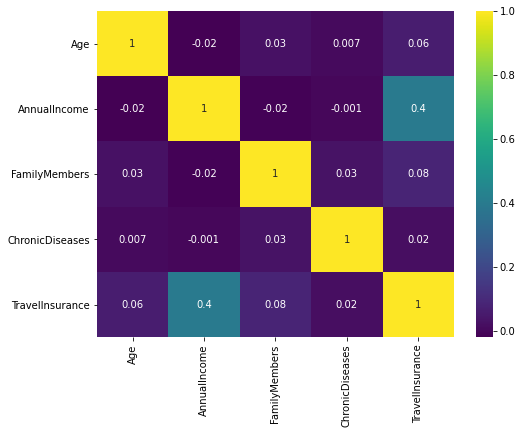

In [7]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

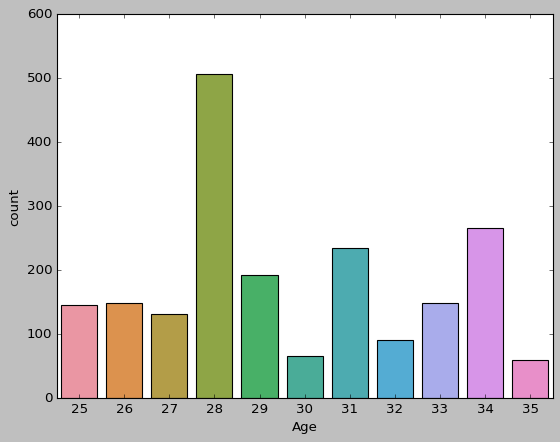

In [8]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["Age"]);

Most of the applications are from the people aged 28 and lowest from age 35.
Maximum age of the applicant is 35 and the minimum is 25 years.

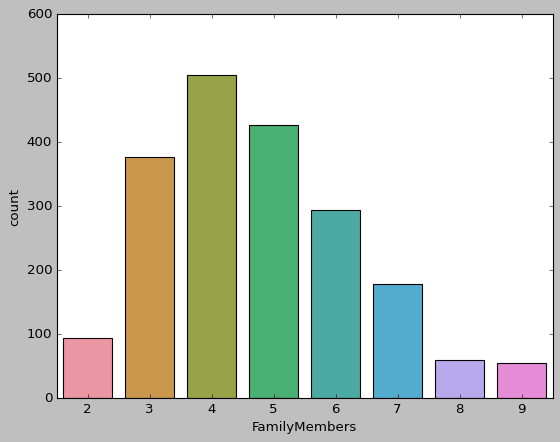

In [9]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["FamilyMembers"]);

Most of the family members count to 4 with lowest being 8 and 9.

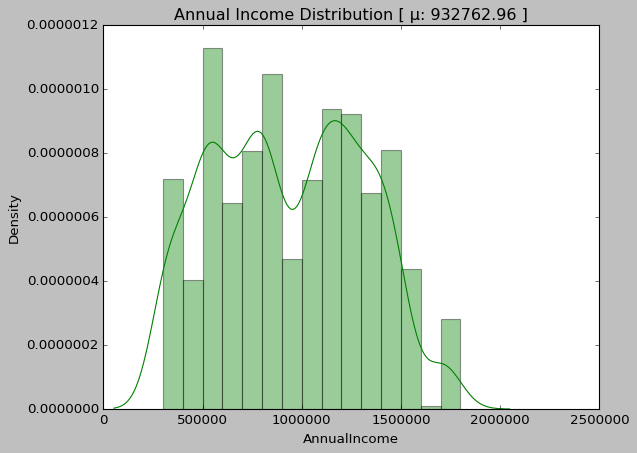

In [10]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["AnnualIncome"], color="g")
plt.title(f"Annual Income Distribution [ \u03BC: {df['AnnualIncome'].mean():.2f} ]")
plt.show()

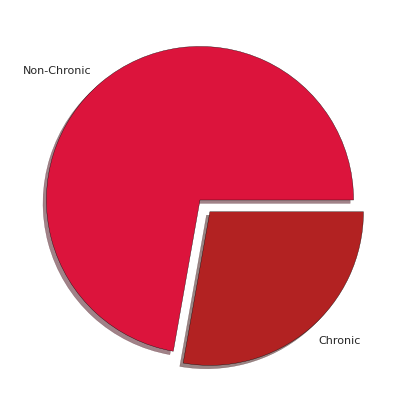

In [11]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["ChronicDiseases"].value_counts(), 
        colors=["crimson","firebrick"], 
        labels=["Non-Chronic","Chronic"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

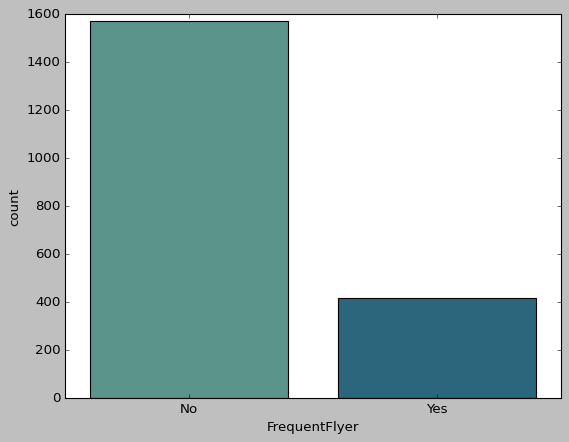

In [12]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["FrequentFlyer"], palette="crest");

Most of the applicants are `Non Frequent Flyers`

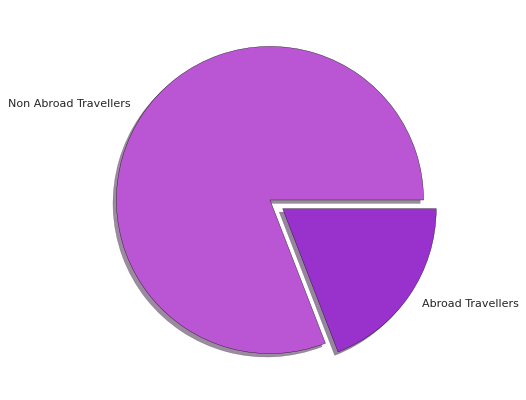

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["EverTravelledAbroad"].value_counts(), 
        colors=["mediumorchid","darkorchid"], 
        labels=["Non Abroad Travellers","Abroad Travellers"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

Most of the applicants are `Non Abroad Travellers`

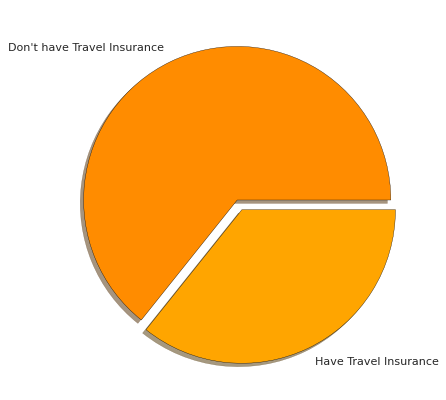

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["TravelInsurance"].value_counts(), 
        colors=["darkorange","orange"], 
        labels=["Don't have Travel Insurance","Have Travel Insurance"], 
        shadow = True, 
        explode = (0, 0.07)
        )
plt.show()

Most of the flyers `don't have a Travel Insurance`

## Making the dataset all numerical

In [15]:
# Yes : 1 , No : 0
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

In [16]:
# Having a look at the dataset after the numerical transformation
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,0,0,0
1,31,0,1250000,7,0,0,0,0
2,34,0,500000,4,1,0,0,1
3,28,0,700000,3,1,0,0,0
4,28,0,700000,8,1,1,0,0


## Splitting the data into training and test datasets
Here, we are trying to predict whether the traveller has a Travel Insurance or not using the given data. Hence, the `TravelInsurance` will be the y label and rest of the data will be the X or the input data.

In [17]:
# X data
X = df.drop("TravelInsurance", axis=1)

In [18]:
X.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,6,1,0,0
1,31,0,1250000,7,0,0,0
2,34,0,500000,4,1,0,0
3,28,0,700000,3,1,0,0
4,28,0,700000,8,1,1,0


In [19]:
# y data
y = df["TravelInsurance"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [20]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test)

(1589, 398)

## Training the Model

## Random Forest Classifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
RandomForestClassifierScore = rf.score(X_test,y_test)
RandomForestClassifierScore

0.8015075376884422

In [25]:
print("Accuracy obtained by RandomForestClassifier model:", RandomForestClassifierScore*100)

Accuracy obtained by RandomForestClassifier model: 80.15075376884423


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
LogisticRegressionScore = lr.score(X_test,y_test)
LogisticRegressionScore

0.6457286432160804

In [29]:
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 64.57286432160804


## KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
KNeighborsClassifierScore = knn.score(X_test,y_test)
KNeighborsClassifierScore

0.821608040201005

In [33]:
print("Accuracy obtained by KNeighborsClassifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by KNeighborsClassifier model: 82.1608040201005


## CatBoost Classifier

In [34]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.5406686	total: 54ms	remaining: 486ms
1:	learn: 0.4887285	total: 54.9ms	remaining: 220ms
2:	learn: 0.4661983	total: 57.1ms	remaining: 133ms
3:	learn: 0.4502142	total: 57.7ms	remaining: 86.6ms
4:	learn: 0.4441521	total: 58.3ms	remaining: 58.3ms
5:	learn: 0.4361465	total: 58.9ms	remaining: 39.3ms
6:	learn: 0.4304888	total: 59.5ms	remaining: 25.5ms
7:	learn: 0.4246885	total: 60ms	remaining: 15ms
8:	learn: 0.4195860	total: 60.5ms	remaining: 6.72ms
9:	learn: 0.4150837	total: 61.1ms	remaining: 0us


In [35]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 84.17085427135679


## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 80.65326633165829


## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 84.42211055276381


## Comparing performance of the models

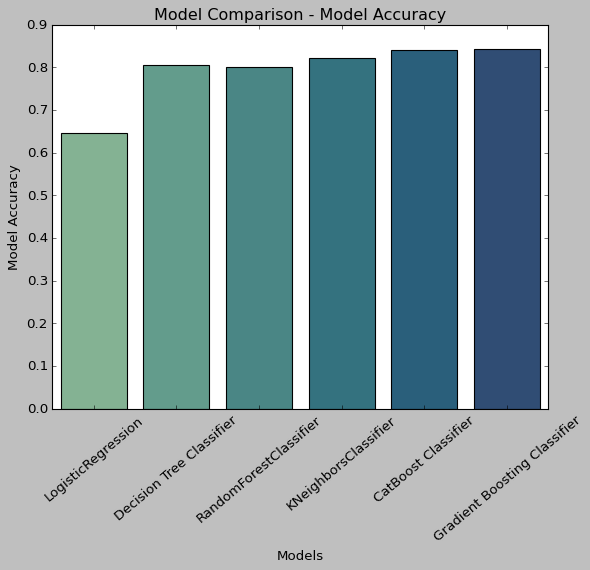

In [40]:
plt.style.use("classic")
x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "CatBoost Classifier", 
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");

## Hyperparamter Tuning on Random Forest Classifier

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rf = GridSearchCV(estimator = rf, 
                              param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [42]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 12.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [43]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [44]:
grid_search_rf.best_score_

0.8338671517399626

In [45]:
grid_search_rf_predict = grid_search_rf.predict(X_test)

In [46]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rf.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 4.04%.


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, grid_search_rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       257
           1       0.95      0.57      0.71       141

    accuracy                           0.84       398
   macro avg       0.88      0.78      0.80       398
weighted avg       0.86      0.84      0.82       398

